In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#로이터 기사 데이터 셋 로딩
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words = 10000)

In [3]:
train_data.shape

(8982,)

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?')for i in train_data[0]])

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[0]

3

In [8]:
# 데이터 준비
def vectorize_sequences(sequences, dimension = 10000):

  results = np.zeros((len(sequences),dimension))
  
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

#데이터의 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [10]:
# 라벨 데이터의 엔코딩
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels),dimension))

  for i, sequence in enumerate(labels):
    results[i, sequence] = 1

  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
# categorical 데이터로 변환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
# 신경망 구성
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.summary() #자료 요약 첫 param이 큰 이유는 인풋의 양이 커서

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
# 훈련 데이터의 준비
x_val = x_train[:1000]
partical_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partical_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partical_x_train, partical_y_train, epochs=20, batch_size=512, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 125ms/step - loss: 2.7166 - accuracy: 0.4845 - val_loss: 1.7740 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 2s 102ms/step - loss: 1.4369 - accuracy: 0.7169 - val_loss: 1.3181 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 2s 106ms/step - loss: 1.0471 - accuracy: 0.7819 - val_loss: 1.1541 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 2s 100ms/step - loss: 0.8163 - accuracy: 0.8300 - val_loss: 1.0416 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 2s 97ms/step - loss: 0.6475 - accuracy: 0.8629 - val_loss: 0.9724 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 2s 102ms/step - loss: 0.5129 - accuracy: 0.8926 - val_loss: 0.9718 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 2s 106ms/step - loss: 0.4162 - accuracy: 0.9143 - val_loss: 0.9494 - val_accuracy: 0.7930
Epoch 8

In [17]:
# 학습 결과를 가져옴
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) +1)

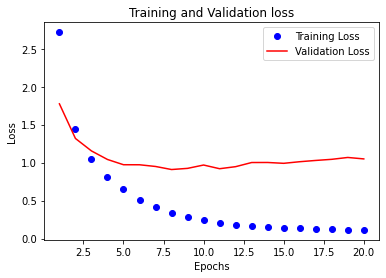

In [18]:
# 결과 시각화
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

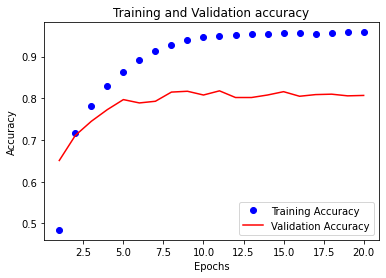

In [19]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()